In [1]:
import h5py, numpy as np, matplotlib.pyplot as plt, os, sys, time

In [2]:
result_dict = {}

import h5py, numpy as np, matplotlib.pyplot as plt

file_name = 'annihilation_ratio_data/z5_101x101_ratios.h5'

with h5py.File(file_name, 'r') as h5f:
    initial_state_options   = list(h5f['initial_state_options'])
           
    for key in list(h5f.keys())[3:-4]:
        # try:
        print(key, np.array(h5f[key]))
        # except:
        #     print(f"Couldn't print {key}")
    
    initial_state_options   = [keystr.decode('ascii') for keystr in initial_state_options]

    inum = 2
    fnum = 0
    conv_keys               = list(h5f['final_state_options'])

    conv_keys               = [keystr.decode('ascii') for keystr in conv_keys]
    mdm1 = np.unique(h5f['mdm1'])
    mdm2 = np.unique(h5f['mdm2'])
    total_ratios = 0

    for init_key in initial_state_options:
        for f_key in conv_keys:
            total_ratios = total_ratios + np.asarray(h5f[init_key][f_key])

    result_dict = {}
    for init_key in initial_state_options:
        result_dict[init_key] = {}
        for f_key in conv_keys:
            result_dict[init_key][f_key] =  np.asarray(h5f[init_key][f_key]).reshape(mdm1.size, mdm2.size)
    


la32 0.0
la41 0.001
la412 0.0
la42 0.001
laS1 0.1
laS2 0.1
mdm1 [1.e+02 1.e+02 1.e+02 ... 2.e+05 2.e+05 2.e+05]
mdm2 [1.00000000e+02 1.07897231e+02 1.16418125e+02 ... 1.71794555e+05
 1.85361568e+05 2.00000000e+05]
muS1 [500 500 500 ... 500 500 500]
muS2 [0 0 0 ... 0 0 0]
units b'GeV'


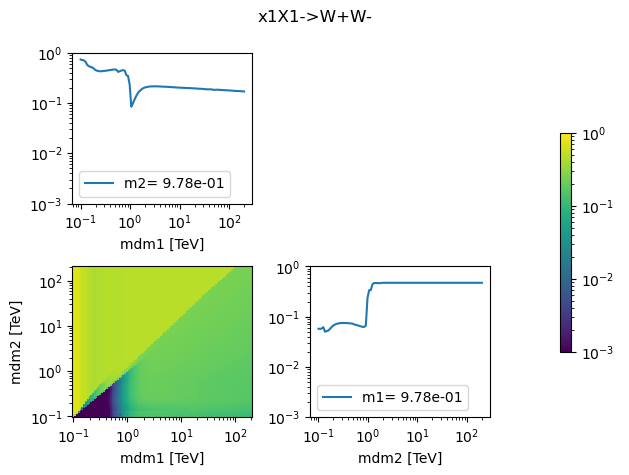

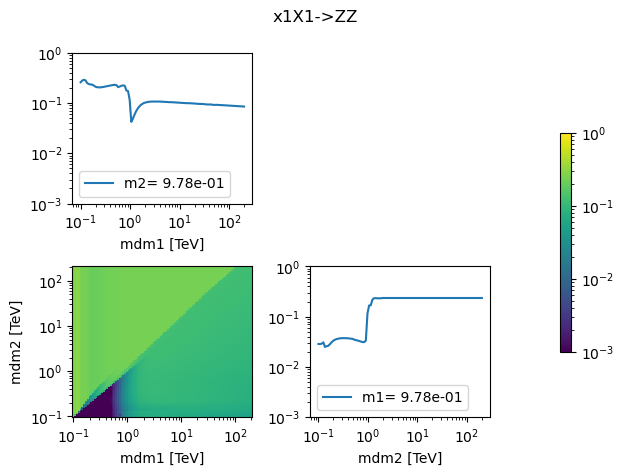

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_25543/1898983840.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0,0].set_yscale(norm)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_25543/1898983840.py:43: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1,1].set_yscale(norm)


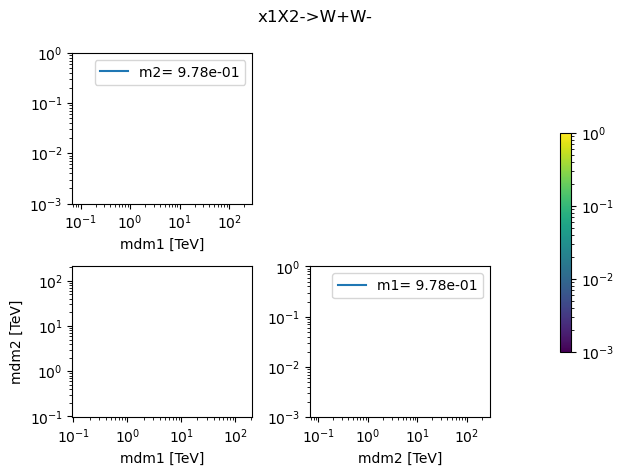

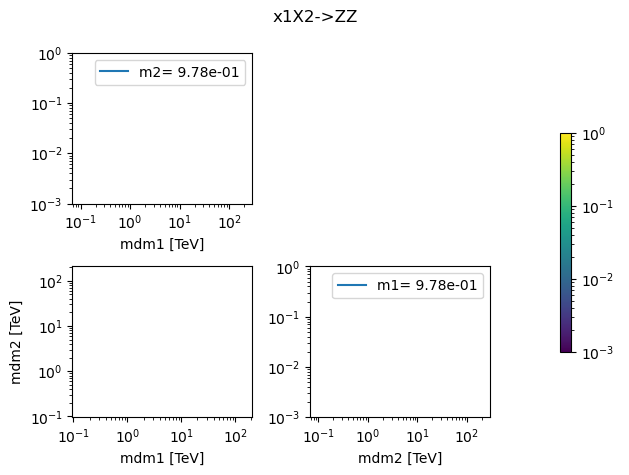

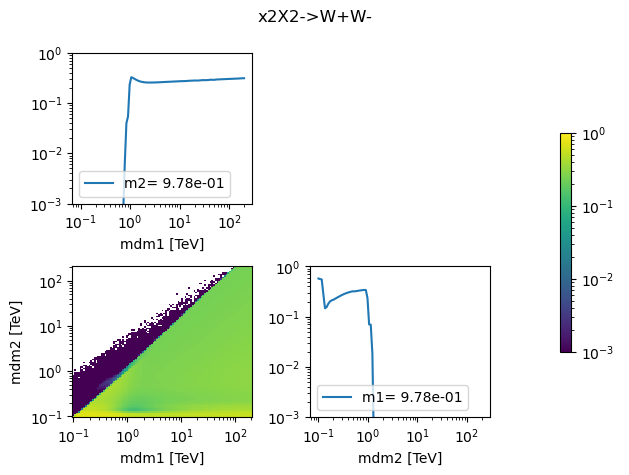

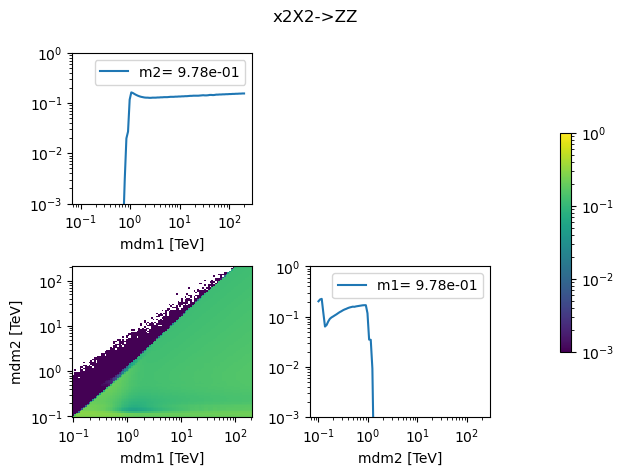

In [5]:
ikey = 'x1X1'
fkey = 'W+W-'
norm = 'log'
from mpl_toolkits.axes_grid1 import make_axes_locatable

slice_mass = 1.

for ikey in ['x1X1', 'x1X2', 'x2X2']:
    for fkey in conv_keys[:2]:

        fig, ax = plt.subplots(2,3, layout='tight', gridspec_kw={'width_ratios':[1,1,0.4]})
        plt.suptitle(f"{ikey}->{fkey}")

        ax[0,0].plot(mdm1/1e3, result_dict[ikey][fkey][:, np.abs(mdm2/1e3-slice_mass).argmin()].T, label=f"m2= {mdm2[np.abs(mdm2/1e3-slice_mass).argmin()]/1e3:.2e}")
        ax[0,0].set_xlabel('mdm1 [TeV]')
        ax[0,0].legend()
        ax[0,0].set_xscale('log')
        ax[0,0].set_yscale(norm)
        ax[0,0].set_ylim(1e-3, 1e0)



        pcm=ax[1,0].pcolormesh(mdm1/1e3, 
                        mdm2/1e3, 
                        result_dict[ikey][fkey].T, 
                        vmin=1e-3,
                        vmax=1e0,
                        norm=norm)
        
        fig.colorbar(mappable=pcm, ax=ax[:,2])


        ax[1,0].set_xlabel('mdm1 [TeV]')
        ax[1,0].set_ylabel('mdm2 [TeV]')
        ax[1,0].loglog()



        ax[1,1].plot(mdm2/1e3, result_dict[ikey][fkey][np.abs(mdm1/1e3-slice_mass).argmin(), :].T, label=f"m1= {mdm1[np.abs(mdm1/1e3-slice_mass).argmin()]/1e3:.2e}")
        ax[1,1].set_xlabel('mdm2 [TeV]')

        ax[1,1].set_xscale('log')
        ax[1,1].set_yscale(norm)
        ax[1,1].set_ylim(1e-3, 1e0)
        ax[1,1].legend()


        ax[0,1].axis('off')
        ax[0,2].axis('off')
        ax[1,2].axis('off')


        # plt.colorbar(pcm, ax=ax[:, 1], shrink=0.6, pad=1.5)
        plt.show()  

In [ ]:
conv_keys

['W+W-',
 'ZZ',
 'hh',
 'bB',
 'cC',
 'lL',
 'GG',
 'tT',
 'AA',
 'sS',
 'uU',
 'dD',
 'mM',
 'AW+W-',
 'hx2',
 'hx1',
 'hX1']

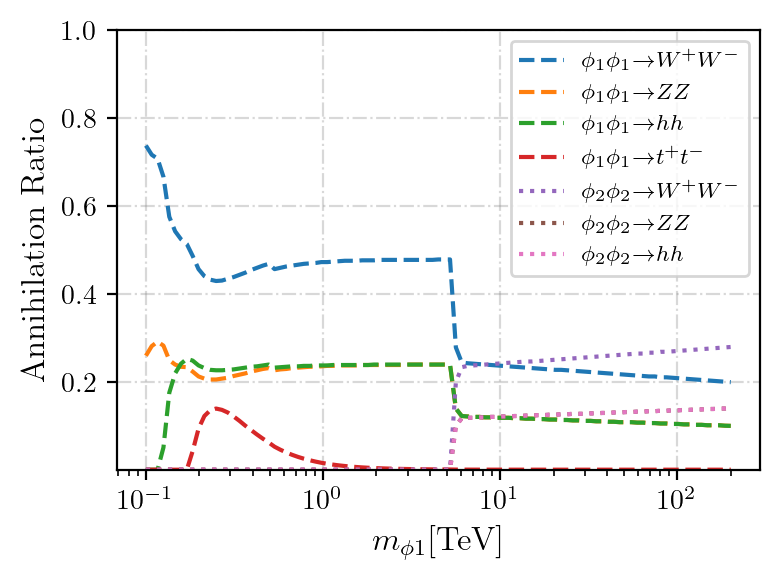

In [6]:
ikey = 'x1X1'
fkey = 'W+W-'
norm = 'log'
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({
    "text.usetex": True,
    "font.sans-serif": "Helvetica",
})

slice_mass = 8.
fig, ax = plt.subplots(1,1, figsize = (4,3), layout='tight', dpi=200)

linestyles = ['--', '-.',':']
plot_ikeys = [r'$\phi_1\phi_1$', r'$\phi_1\phi_2$',  r'$\phi_2\phi_2$']

nice_fkeys = [r'$W^+ W^-$', r'$ZZ$', r'$hh$', r'$b^+b^-$',r'$c^+c^-$', r'$\tau$', r'gg', r'$t^+t^-$',r'$\gamma\gamma$',
              r'$s^+s^-$',r'$u^+u^-$',r'$d^+d^-$',r'$m$',r'$\gamma W^+W^-$',r'$h\chi_2$',r'$h\chi_1$',r'$h\chi_1$']

for ikeyIdx, ikey in enumerate(['x1X1', 'x1X2', 'x2X2']):
    plot_ikey = plot_ikeys[ikeyIdx]
    linestyle = linestyles[ikeyIdx]
    for fkeyIdx, fkey in enumerate(conv_keys):
        nice_fkey = nice_fkeys[fkeyIdx]
        values = result_dict[ikey][fkey][:, np.abs(mdm2/1e3-slice_mass).argmin()].T
        if values.max()>0.05:
            plt.plot(mdm1/1e3, values, label=plot_ikey+r"$\rightarrow$"+nice_fkey, ls=linestyle) #label=f"m2= {mdm2[np.abs(mdm2/1e3-slice_mass).argmin()]/1e3:.2e}")

plt.ylim([1e-4, 1e0])
plt.ylabel(r'$\rm{Annihilation \; Ratio}$', size=12)
plt.xlabel(r'$m_{\phi 1} \rm{[TeV]}$', size=12)
# plt.loglog()

plt.xscale('log')
plt.legend(fontsize=8)
plt.grid(which='major', ls='-.', c='grey', alpha=0.3)
plt.savefig("Z5_ratios.pdf")
plt.show()  

In [7]:
from gammabayes.dark_matter.spectral_models import Z5_DM_spectra 


/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:

from tqdm import tqdm


z5_spec = Z5_DM_spectra()

In [9]:
z5_spec.sqrtchannelfuncdictionary['W+W-']((0.0, -1.0))

array(0.04936902)

In [10]:
import numpy as np

energy_axis = np.logspace(-1,2,301)


print(z5_spec(energy=energy_axis, mDM1=energy_axis*0+5., mDM2=energy_axis*0+7.))

[ -4.30248768  -4.31801228  -4.33372608  -4.34964139  -4.36577088
  -4.38212764  -4.39872074  -4.41554504  -4.43259247  -4.44985469
  -4.46732306  -4.48499007  -4.50285599  -4.52092281  -4.53919254
  -4.55766745  -4.57635466  -4.59526396  -4.61440513  -4.63378832
  -4.65342371  -4.67331263  -4.69344812  -4.71382277  -4.73442878
  -4.75525823  -4.77630841  -4.7975813   -4.81907895  -4.84080345
  -4.86275689  -4.88494338  -4.90737653  -4.93007243  -4.95304776
  -4.97631983  -4.99989975  -5.02377663  -5.04793477  -5.07235777
  -5.09702836  -5.1219328   -5.14707324  -5.17245513  -5.19808408
  -5.22396613  -5.25011293  -5.27653824  -5.30325568  -5.33027956
  -5.35762441  -5.38529336  -5.41327842  -5.44157076  -5.47016084
  -5.49903875  -5.52820125  -5.55764976  -5.58738532  -5.61740894
  -5.64772144  -5.67832543  -5.7092353   -5.74046872  -5.7720442
  -5.80398119  -5.83629258  -5.86896646  -5.90198507  -5.93532941
  -5.96897914  -6.00292052  -6.03716228  -6.07171779  -6.10660105
  -6.141826

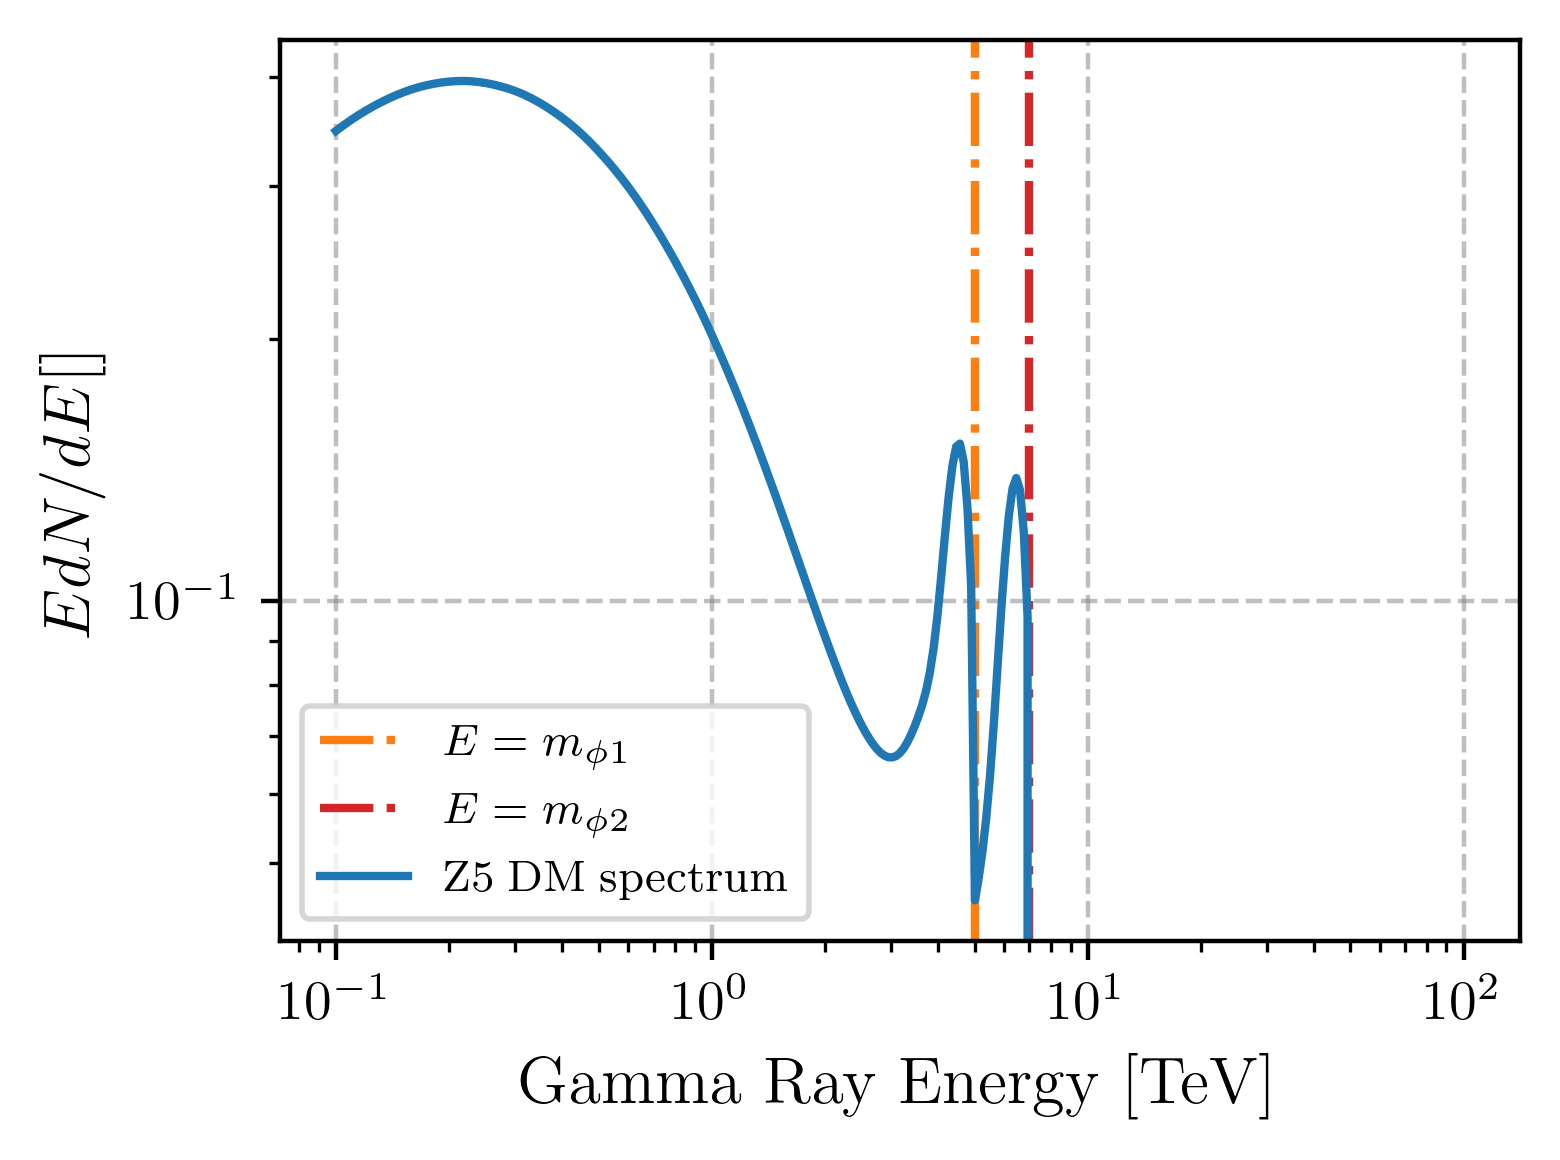

In [11]:
from scipy.special import logsumexp
from matplotlib.pyplot import get_cmap
from gammabayes.utils.integration import logspace_simpson

energy_axis = np.logspace(-1,2,301)
test_mdm1 = 5.
test_mdm2 = 7.


log_spec = z5_spec(energy=energy_axis, mDM1=energy_axis*0+test_mdm1, mDM2=energy_axis*0+test_mdm2)
normed_spec = np.exp(log_spec+np.log(energy_axis)-logspace_simpson(logy=log_spec, x=energy_axis))

plt.figure(figsize=(4,3), dpi=400)

plt.axvline(test_mdm1, c='tab:orange', ls='-.', label=r'$E=m_{\phi 1}$')#+'='+f"{test_mdm1}"+r" $\rm{TeV}$")
plt.axvline(test_mdm2, c='tab:red', ls='-.', label=r'$E=m_{\phi 2}$')#+'='+f"{test_mdm2}"+r" $\rm{TeV}$")
plt.plot(energy_axis, normed_spec, label=r'$\rm{Z5 \; DM \; spectrum}$')

plt.grid(ls='--', c='grey', alpha=0.5, which='major')
# plt.grid(ls='--', c='grey', alpha=0.5, which='minor')
plt.legend(loc='lower left', fontsize=8)
plt.ylabel(r'$E dN/dE \rm{[]}$', size=12)
plt.xlabel(r'\rm{Gamma Ray Energy [TeV]}', size=12)
plt.loglog()
plt.tight_layout()
plt.savefig("Z5_spectrum.pdf")
plt.show()

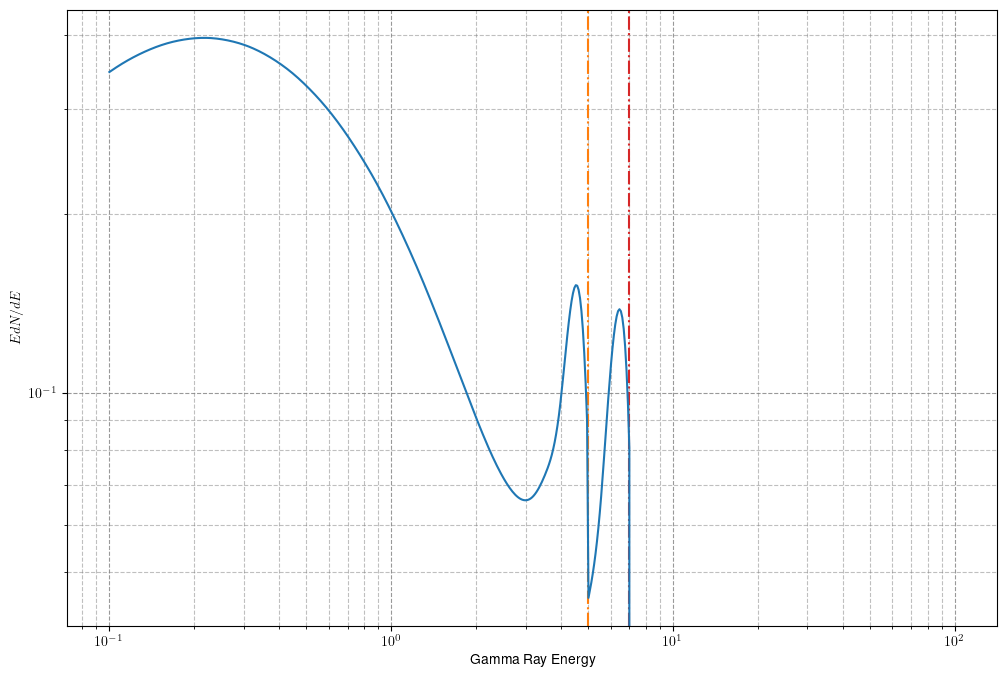

In [12]:
energy_axis = np.logspace(-1,2,601)
test_mdm1 = 5.
test_mdm2 = 7.


log_spec = np.squeeze(z5_spec.mesh_efficient_logfunc(energy=energy_axis, kwd_parameters={'mDM1':test_mdm1, 'mDM2': test_mdm2}))
normed_spec = np.exp(log_spec+np.log(energy_axis)-logspace_simpson(logy=log_spec, x=energy_axis))

plt.figure(figsize=(12,8))

plt.axvline(test_mdm1, c='tab:orange', ls='-.')
plt.axvline(test_mdm2, c='tab:red', ls='-.')
plt.plot(energy_axis, normed_spec)

plt.grid(ls='--', c='grey', alpha=0.8, which='major')
plt.grid(ls='--', c='grey', alpha=0.5, which='minor')

plt.ylabel(r'$E dN/dE$')
plt.xlabel('Gamma Ray Energy')
plt.loglog()
plt.show()